<a href="https://colab.research.google.com/github/GautierHanna/Circle-and-NN/blob/master/Circle_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

On this notebook, we will plot how a NN learn a disk. We will have a grid of a parametrized size, and a NN. 

In [1]:
import random as rd
import numpy as np
import tensorflow as tf
from math import sqrt


from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import InputLayer, Input
from tensorflow.python.keras.layers import Reshape, MaxPooling2D
from tensorflow.python.keras.layers import Conv2D, Dense, Flatten
from keras import regularizers

import matplotlib.pyplot as plt
from matplotlib import colors

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

Using TensorFlow backend.


We define our grid 

In [0]:
def grid(size):
    return np.zeros((size,size))

We create our datasets. 

In [0]:
def data(samples,sizegrid):
    return np.random.randint(sizegrid, size=(samples,2)).astype('float32') 

It creates an array of random "couples" - the parameter 2 in the size"- each coordinate is between 0 and the size of the grid

In [4]:
data(5,8)

array([[7, 0],
       [2, 5],
       [1, 6],
       [6, 2],
       [0, 4]])

Now we will mark our points. In first instance, we will write function where the circle is in the center.

In [0]:
def mark(sizegrid,point,radius_ratio):
    return ((point[0]-sizegrid/2)**2 + (point[1]-sizegrid/2)**2 <= (sizegrid*radius_ratio)**2)+1

def mark_dataset(sizegrid,data,radius_ratio):
    L = [mark(sizegrid,point,radius_ratio) for point in data]
    return np.asarray(L)

The mark function return 1 if the point is not in the cicle of center "center" and radius "radius", and 2 if it is. The function mark_dataset exploit the mark function for a dataset. __Probably there is another (and better) method, using vectorization.__.

In [31]:
print(mark(8,[4,4],1/3))
print(mark(6,[0,0],1/3))

dataset = data(5,8)
print(dataset)
print(mark_dataset(8,dataset,1/3))

2
1
[[1. 1.]
 [5. 2.]
 [7. 4.]
 [5. 3.]
 [0. 6.]]
[1 2 1 2 1]


Now, it is the time to build a NN.


In [0]:
def buildmodel(neurons_on_layers,X_input,X_output,ep,batch):
    le=len(neurons_on_layers)
    ne=neurons_on_layers
    model = Sequential()
    model.add(Dense(ne[0], 
                    activation='relu'))  #change from 'relu'  
    for j in list(range(1,le)):
        model.add(Dense(ne[j],
                        activation='relu'))    ##changed from 'relu'  'tan'
    model.add(Dense(2, activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) ##normal
    model.fit(X_input,X_output, epochs=ep, batch_size=batch)
    return model 

#def buildmodel(dim,neurons_on_layers,X,Y,ep,batch):
#    le=len(neurons_on_layers)
 #   ne=neurons_on_layers
#    model = Sequential()
#    model.add(Dense(ne[0], input_dim=dim,  
#                    activation='relu'))  #change from 'relu'  
#    for j in list(range(1,le)):
 #       model.add(Dense(ne[j], 
#                        activation='relu'))    ##changed from 'relu'  'tan'
#    model.add(Dense(2, activation='softmax'))
#    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) ##normal
#    model.fit(X, Y, epochs=ep, batch_size=batch)
 #   return model

We have :
 - a grid
 - a function who creates samples
 - a function who marks samples
 - a model of neural network

Now we need to construct vizualizations models

In [0]:

cmap = colors.ListedColormap(['white','red', 'blue'])
bounds = [0,1,2]
norm = colors.BoundaryNorm(bounds, cmap.N)

In [0]:
def plotgrid(gridsize, nb_sample, radius_ratio):
    dataset = grid(gridsize)
    samples = data(nb_sample,gridsize)
    for point in samples : 
        dataset[point[0],point[1]] = mark(gridsize,[point[0],point[1]], radius_ratio)
        #print("coord=", point, "value=",dataset[point[0],point[1]])
    # create discrete colormap
    cmap = colors.ListedColormap(['white','red', 'blue'])
    bounds = [0,0.5,1.5,2.5]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    ax.imshow(dataset, cmap=cmap, norm=norm)

    # draw gridlines
    ax.grid(which='major', axis='both', linewidth=0)

    plt.show()

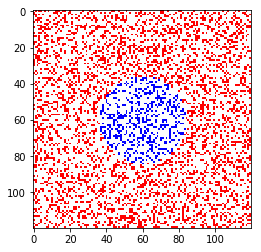

In [20]:
plotgrid(120,4950,1/5)

We can compute the radius_ratio for which the number of blue points are equal to the number of red points.
Calling this ratio $r$ and the gridsize $s$, it means that $ (rs)^2 = s^2/(2\pi) \Leftrightarrow r = \sqrt{1/2\pi} \simeq 0.4 $.

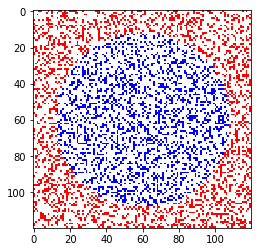

In [21]:
plotgrid(120,4950,0.4)

We will plot the figure learned by the algorithm. We first create a plot function, and then create a model. The plot function will have the trained model in parameter. So it just needs a new dataset, and the output will be the predictions.

In [0]:
def plotgrid_network(gridsize, nb_sample, model):
    dataset = grid(gridsize)
    
    data_input = data(nb_sample,gridsize)
    for point in data_input : 
        
        dataset[int(point[0]),int(point[1])] = model.predict_classes(point[np.newaxis,:])+1
        #print("coord=", point, "value=",dataset[point[0],point[1]])
    # create discrete colormap
    cmap = colors.ListedColormap(['white','red', 'blue'])
    bounds = [0,0.5,1.5,2.5]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    fig, ax = plt.subplots()
    ax.imshow(dataset, cmap=cmap, norm=norm)

    # draw gridlines
    ax.grid(which='major', axis='both', linewidth=0)
    

    plt.show()

In [0]:
Datasamples = data(60000,300)


In [0]:
X_train = Datasamples[:50000]
X_test = Datasamples[50000:]
Y_train = mark_dataset(300,X_train,0.4)-1
Y_test = mark_dataset(300,X_test,0.4)-1



In [41]:
model = buildmodel([30,30],X_train,Y_train,3,5)

Epoch 1/3
50000/50000 [==============================] - 13s 263us/sample - loss: 0.6913 - acc: 0.6926
Epoch 2/3
50000/50000 [==============================] - 13s 257us/sample - loss: 0.3959 - acc: 0.8161
Epoch 3/3
50000/50000 [==============================] - 13s 259us/sample - loss: 0.1657 - acc: 0.9386


In [46]:
predictions = model.predict(X_test)
pred2 = model.predict_classes(X_test)+1

print(pred2)

[2 1 2 ... 2 2 1]


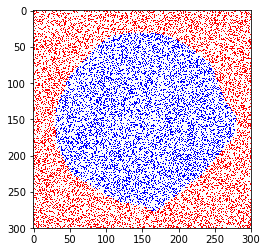

In [66]:
plotgrid_network(300,30000,model)

What happens with only 1 epoch ?

In [68]:
model = buildmodel([30,30],X_train,Y_train,ep = 1, batch =5)

50000/50000 [==============================] - 13s 260us/sample - loss: 0.5859 - acc: 0.7128


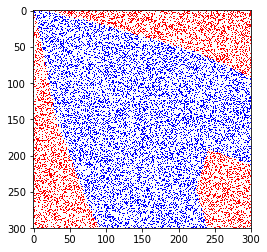

In [69]:
plotgrid_network(300,30000,model)